In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [2]:
print(tf.__version__)

1.13.2


In [3]:
df = pd.read_csv("creditcardfraud_normalised.csv")

In [4]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,...,0.564933,0.553154,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,...,0.565220,0.537005,0.664877,0.468492,0.592823,0.411176,0.416593,0.312585,0.002642,0
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


In [5]:
cols = df.columns

In [6]:
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'class'],
      dtype='object')

In [7]:
y=df['class']
X=df.drop(columns=['class'], axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
X_train2, X_validate, y_train2, y_validate = train_test_split(X_train, y_train, test_size=0.3, random_state=101)

In [11]:
X.shape

(284807, 29)

In [12]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [13]:
X_train.shape

(199364, 29)

In [14]:
input_dim = X_train2.shape[1]
BATCH_SIZE = 200
EPOCHS = 100

model = Sequential([
    
    Dense(input_dim, activation='elu', input_shape=(input_dim,)),
    Dense(16, activation='elu'),
    Dense(8, activation='elu'),
    Dense(4, activation='elu'),
    
    Dense(2, activation='elu'),
    
    Dense(4, activation='elu'),
    Dense(8, activation='elu'),
    Dense(16, activation='elu'),
    Dense(input_dim, activation='elu')
])

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 29)                870       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 12        
______________________

In [15]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard module is not an IPython extension.


UsageError: Line magic function `%tensorboard` not found.


In [16]:
from datetime import datetime

# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(model.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'logs/{log_subdir}',
    batch_size=BATCH_SIZE,
    update_freq='batch'
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]

In [17]:
history = model.fit(
    X_train2, X_train2,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(X_validate, X_validate)
);

Train on 139554 samples, validate on 59810 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
139554/139554 [==============================] - 4s 32us/sample - loss: 0.0137 - acc: 0.8770 - val_loss: 0.0017 - val_acc: 0.9916
Epoch 2/100
139554/139554 [==============================] - 3s 23us/sample - loss: 0.0017 - acc: 0.9921 - val_loss: 0.0017 - val_acc: 0.9916
Epoch 3/100
139554/139554 [==============================] - 3s 23us/sample - loss: 0.0017 - acc: 0.9921 - val_loss: 0.0016 - val_acc: 0.9916
Epoch 4/100
139554/139554 [==============================] - 3s 23us/sample - loss: 0.0016 - acc: 0.9921 - val_loss: 0.0015 - val_acc: 0.9916
Epoch 5/100
139554/139554 [==============================] - 3s 23us/sample - loss: 0.0015 - acc: 0.9921 - val_loss: 0.0015 - val_acc: 0.9916
Epoch 6/100
139554/139554 [==============================] - 3s 23us/sample - loss: 0.0015 - acc: 0.9921 - val_loss: 0.0015 - val_acc: 0.9916
Epoch 7/100
139554/139554 [======================

In [18]:
reconstructions = model.predict(X_test)

In [19]:
import numpy as np

In [20]:
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

In [21]:
X_test_df=pd.DataFrame(X_test, index=X_test.index, columns=X_test.columns)

In [22]:
y_test_df=pd.DataFrame(y_test, index=X_test.index, columns=['class'])

In [23]:
test_clean_col=list(y_test_df[y_test_df['class']==0].index)
X_test_cleanDF=X_test_df.loc[test_clean_col,:]
test_fraud_col=list(y_test_df[y_test_df['class']==1].index)
X_test_fraudDF=X_test_df.loc[test_fraud_col,:]

In [24]:
clean_reconstruction=model.predict(np.array(X_test_cleanDF))
fraud_reconstruction=model.predict(np.array(X_test_fraudDF))

In [25]:
mse_clean = np.mean(np.power(np.array(X_test_cleanDF) - clean_reconstruction, 2), axis=1)
mse_fraud = np.mean(np.power(np.array(X_test_fraudDF) - fraud_reconstruction, 2), axis=1)

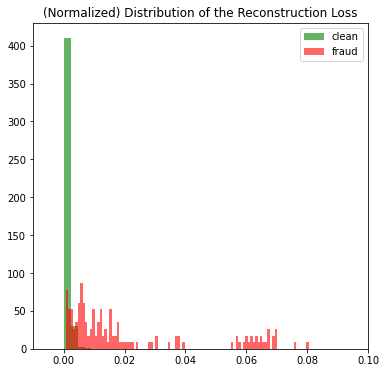

In [26]:
fig, ax = plt.subplots(figsize=(6,6))

ax.hist(mse_clean, bins=100, density=True, label="clean", alpha=.6, color="green")
ax.hist(mse_fraud, bins=100, density=True, label="fraud", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.xlim([-0.01,0.1])
plt.legend()
plt.show()

In [27]:
df[df['class']==0].shape[0]/df[df['class']==1].shape[0]

577.8760162601626

In [28]:
features = df.drop('class',axis=1).values

In [29]:
features

array([[9.35192e-01, 7.66490e-01, 8.81365e-01, ..., 4.18976e-01,
        3.12697e-01, 5.82400e-03],
       [9.78542e-01, 7.70067e-01, 8.40298e-01, ..., 4.16345e-01,
        3.13423e-01, 1.05000e-04],
       [9.35217e-01, 7.53118e-01, 8.68141e-01, ..., 4.15489e-01,
        3.11911e-01, 1.47390e-02],
       ...,
       [9.90905e-01, 7.64080e-01, 7.81102e-01, ..., 4.16593e-01,
        3.12585e-01, 2.64200e-03],
       [9.54209e-01, 7.72856e-01, 8.49587e-01, ..., 4.18520e-01,
        3.15245e-01, 3.89000e-04],
       [9.49232e-01, 7.65256e-01, 8.49601e-01, ..., 4.16466e-01,
        3.13401e-01, 8.44600e-03]])

In [54]:
#Finding outliers using modified z-score
THRESHOLD = 3

def mz_score(x):
    med = np.median(x)
    abs_med = np.abs(x - med)
    mad = np.median(abs_med)
    
    return 0.6745 * abs_med/ mad
 

MZ_scores = mz_score(mse)
outliers = MZ_scores > THRESHOLD

In [55]:
print(f"Detected {np.sum(outliers):,} outliers in a total of {np.size(z_scores):,} transactions [{np.sum(outliers)/np.size(z_scores):.2%}].")

Detected 4,024 outliers in a total of 85,443 transactions [4.71%].


In [50]:
from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve)

# get (mis)classification
cm = confusion_matrix(y_test, outliers)

# true/false positives/negatives
(tn, fp, 
 fn, tp) = cm.flatten()

In [56]:
print(f"""The classifications using the MAD method with threshold={THRESHOLD} are as follows:
{cm}

percentage of transactions labeled as fraud that were correct (precision): {tp}/({fp}+{tp}) = {tp/(fp+tp):.2%}
percentage of fraudulent transactions were caught succesfully (recall):    {tp}/({fn}+{tp}) = {tp/(fn+tp):.2%}""")

The classifications using the MAD method with threshold=3 are as follows:
[[81400  3899]
 [   19   125]]

percentage of transactions labeled as fraud that were correct (precision): 125/(3899+125) = 3.11%
percentage of fraudulent transactions were caught succesfully (recall):    125/(19+125) = 86.81%


In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
print(roc_auc_score(y_test, outliers))

0.9111728791271488
